<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
dataset = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv')

print(dataset.head())
#from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder()
#dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])



  Sleep Stage  MeanP_Alpha_F4  MedianF_Alpha_F4  MeanF_Alpha_F4  \
0           W         0.00051           8.74146        18.48195   
1           W         0.00040          10.24000        17.48293   
2           W         0.00036           9.74049        17.98244   
3           W         0.00035          10.11512        17.60780   
4           W         0.00033           9.74049        17.60780   

   Spectral Edge_Alpha_F4  PeakF_Alpha_F4  MeanP_Beta_F4  MedianF_Beta_F4  \
0                17.48293         8.24195        0.00071         19.73073   
1                16.85854        10.61463        0.00051         17.23317   
2                17.48293         8.74146        0.00047         17.60780   
3                17.10829         9.61561        0.00047         17.35805   
4                17.23317         8.11707        0.00043         17.23317   

   MeanF_Beta_F4  Spectral Edge_Beta_F4  ...  MeanP_Delta_O2  \
0       29.84585               33.84195  ...         0.00724   
1     

In [21]:
X= dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
xgb_classifier = xgb.XGBClassifier()

In [24]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [25]:
predictions = xgb_classifier.predict(X_test)

In [26]:
predictions

array(['N2', 'R', 'N2', ..., 'N3', 'W', 'N2'], dtype=object)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("Accurecy: ",accuracy_score(y_test, predictions))

[[ 487  699   29  460  693]
 [ 152 6302  745  419  273]
 [   5 1061 3150    3   35]
 [ 148  774   59 2286  107]
 [ 187  225   23   73 3296]]
              precision    recall  f1-score   support

          N1       0.50      0.21      0.29      2368
          N2       0.70      0.80      0.74      7891
          N3       0.79      0.74      0.76      4254
           R       0.71      0.68      0.69      3374
           W       0.75      0.87      0.80      3804

    accuracy                           0.72     21691
   macro avg       0.69      0.66      0.66     21691
weighted avg       0.70      0.72      0.70     21691

Accurecy:  0.7155502282052464


Text(114.0, 0.5, 'Truth')

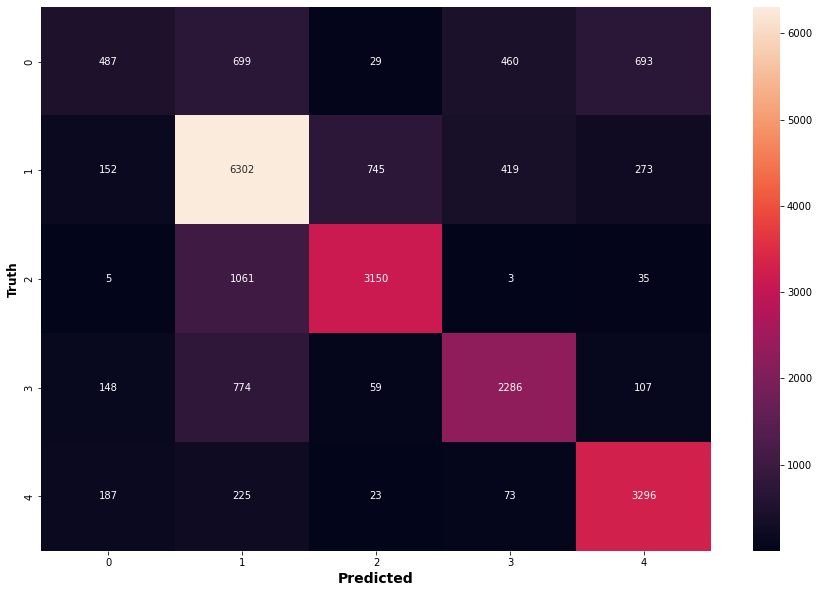

In [28]:
cm = confusion_matrix(y_test, predictions)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
plt.ylabel('Truth',fontsize=12.0, fontweight='bold')